# Advanced Regression Techniques for Predictive Analysis in Healthcare Insurance

## Table of Contents

1. [Introduction](#Introduction)
   - Project Overview
   - Data Significance

2. [Data Preprocessing](#Data-Preprocessing)
   - Loading the Data
   - Encoding Categorical Variables
   - Normalizing the Distribution
   - Feature Standardization
   - Data Splitting

3. [Model Training and Evaluation](#Model-Training-and-Evaluation)
   - Ordinary Least Squares Regression
   - Model Summary and Interpretation
   - Coefficient Analysis
   - Predictive Performance

4. [Visualization](#Visualization)
   - Distribution of Actual vs. Predicted Values
   - Residual Patterns

5. [Cross-Validation](#Cross-Validation)
   - K-Fold Validation Method
   - Model Generalizability

6. [Residual Analysis](#Residual-Analysis)
   - Diagnosing Model Biases
   - Identifying Improvement Areas

7. [Conclusion and Next Steps](#Conclusion-and-Next-Steps)
   - Insights from Model Analysis
   - Transitioning to Random Forest Regression

## Introduction

This notebook stands at the intersection of healthcare and data science, tackling the intricate task of predicting insurance charges with precision. We aim to leverage statistical modeling to forecast healthcare insurance costs based on demographic and health-related features. Our journey begins with data preprocessing to prepare our dataset for analysis, followed by model training using linear regression techniques, and culminates with a transition towards a more robust, non-linear approach using Random Forest regression.

## Import libraries

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from numpy import log
from IPython.display import HTML

## Data Preprocessing:
- **Loading Data**: load a dataset from a CSV file into a pandas DataFrame.

In [2]:
data=pd.read_csv("../Data/insurance_cleaned.csv")
df=data.copy()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,heavy,0,yes,southwest,16884.92400
1,28,male,too_heavy,3,no,southeast,4449.46200
2,33,male,normal,0,no,northwest,21984.47061
3,32,male,heavy,0,no,northwest,3866.85520
4,31,female,heavy,0,no,southeast,3756.62160


In [3]:
df.shape

(1320, 7)

- **Dummy Variables**: Categorical variables (`sex`, `smoker`, `region`, `bmi`) have been encoded into dummy variables using `pd.get_dummies`. This is necessary since most machine learning algorithms require numerical input.

In [4]:
df_new=df.copy()
df_new=pd.get_dummies(data=df,columns=["sex","smoker"],drop_first=True)

In [5]:
df_new.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,heavy,0,southwest,16884.92400,False,True
1,28,too_heavy,3,southeast,4449.46200,True,False
2,33,normal,0,northwest,21984.47061,True,False
3,32,heavy,0,northwest,3866.85520,True,False
4,31,heavy,0,southeast,3756.62160,False,False


In [6]:
df_new=pd.get_dummies(data=df_new,columns=["region","bmi"])

In [7]:
df_new.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_heavy,bmi_normal,bmi_too_heavy,bmi_too_weak
0,19,0,16884.92400,False,True,False,False,False,True,True,False,False,False
1,28,3,4449.46200,True,False,False,False,True,False,False,False,True,False
2,33,0,21984.47061,True,False,False,True,False,False,False,True,False,False
3,32,0,3866.85520,True,False,False,True,False,False,True,False,False,False
4,31,0,3756.62160,False,False,False,False,True,False,True,False,False,False


- **Log Transformation**: Apply a log transformation to the `charges` column to normalize its distribution.
- **Standardization**: The features have been standardized using `StandardScaler` to have zero mean and unit variance, which is often required by many machine learning algorithms.

In [8]:
# df_new.charges=log(df_new.charges)
df_new['charges'] = df_new['charges'].apply(lambda x: log(x))

sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_new),columns=df_new.columns,index=df_new.index)

df_scaled.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_heavy,bmi_normal,bmi_too_heavy,bmi_too_weak
0,-1.472578,-0.900260,0.684392,-1.006079,1.972027,-0.563352,-0.571518,-0.603023,1.749725,1.587451,-0.444772,-1.073939,-0.124035
1,-0.825961,1.585814,-0.773628,0.993958,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,-0.629941,-0.444772,0.931152,-0.124035
2,-0.466729,-0.900260,0.972921,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,-0.629941,2.248343,-1.073939,-0.124035
3,-0.538575,-0.900260,-0.927058,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,1.587451,-0.444772,-1.073939,-0.124035
4,-0.610422,-0.900260,-0.958677,-1.006079,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,1.587451,-0.444772,-1.073939,-0.124035


In [9]:
X=df_scaled.drop("charges",axis=1)
y=df_scaled["charges"] 

- **Splitting Data**: Split the data into training and testing sets to be able to train the model on one part of the data and test its performance on unseen data.

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1056, 12)
(264, 12)
(1056,)
(264,)


The series of OLS (Ordinary Least Squares) regression summaries that have been generated and analyzed serve several crucial purposes in the process of statistical modeling and predictive analysis. Each summary provides insights that contribute to the overall understanding, refinement, and validation of the regression model. Here’s a breakdown of their importance, uses, and the reason for conducting multiple summaries:

### Importance of OLS Regression Summaries

1. **Model Evaluation and Validation:** Each summary offers a snapshot of how well the model explains the variance in the dependent variable (insurance charges, in this case). By observing metrics like R-squared and Adjusted R-squared, we can gauge the model's effectiveness in capturing the relationship between the predictors and the outcome.

2. **Statistical Significance Assessment:** The F-statistic and its associated p-value in each summary tell us whether the relationships observed in the model are statistically significant or if they could have occurred by chance.

3. **Predictor Impact Analysis:** The coefficients for each predictor variable, along with their standard errors, t-values, and p-values, provide insight into the direction and magnitude of each predictor’s impact on the dependent variable. This is crucial for understanding which factors are most influential and should be focused on for policy-making or further analysis.

4. **Model Refinement:** By comparing different summaries as variables are added or removed, we can understand the impact of each variable on the model. This iterative process is key to refining the model for better accuracy and reliability.

5. **Diagnostics for Assumption Validation:** Various tests like the Omnibus test, Durbin-Watson statistic, and Jarque-Bera test help check the assumptions underlying OLS regression, such as normality of residuals and independence of errors. 

### Purpose of Multiple Summaries

Each summary corresponds to a different version of the model, with slight variations in the included predictors. This iterative approach serves several purposes:

1. **Feature Selection:** By systematically adding or removing variables and observing the changes in model metrics, we can identify the most relevant predictors and omit those that do not contribute significantly to the model.

2. **Multicollinearity Assessment:** Adjustments in the model allow us to observe the effects of multicollinearity (when predictors are correlated with each other). The condition number is a key indicator here. By removing or retaining certain variables, we can better manage multicollinearity.

3. **Model Optimization:** Each summary contributes to optimizing the model in terms of predictive power (maximizing R-squared) and simplicity (minimizing the number of predictors without losing explanatory power).

4. **Validation of Model Stability:** Repeatedly analyzing the model with different combinations of variables helps validate the stability of the model. A stable model will show consistently strong statistical significance and R-squared values across different summaries.

### Conclusion

In summary, the practice of generating and analyzing multiple OLS regression summaries is a methodical approach to model building in statistics. It allows us to iteratively refine the model, ensuring that it not only provides a high level of predictive accuracy but also adheres to the assumptions of linear regression. This rigorous process is essential for creating a robust model that reliably informs decision-making, particularly in complex fields like healthcare insurance where the stakes of predictive accuracy are high.

## Model Training and Evaluation:
- **Fitting the Model**: We use Ordinary Least Squares (OLS) regression from `statsmodels` to fit the model on the training data. OLS is a common method for estimating the unknown parameters in a linear regression model.

In [12]:
# Fit the model
lm = sm.OLS(y_train, X_train)
model = lm.fit()

The series of OLS (Ordinary Least Squares) regression summaries that have been generated and analyzed serve several crucial purposes in the process of statistical modeling and predictive analysis. Each summary provides insights that contribute to the overall understanding, refinement, and validation of the regression model. Here’s a breakdown of their importance, uses, and the reason for conducting multiple summaries:

### Importance of OLS Regression Summaries

1. **Model Evaluation and Validation:** Each summary offers a snapshot of how well the model explains the variance in the dependent variable (insurance charges, in this case). By observing metrics like R-squared and Adjusted R-squared, we can gauge the model's effectiveness in capturing the relationship between the predictors and the outcome.

2. **Statistical Significance Assessment:** The F-statistic and its associated p-value in each summary tell us whether the relationships observed in the model are statistically significant or if they could have occurred by chance.

3. **Predictor Impact Analysis:** The coefficients for each predictor variable, along with their standard errors, t-values, and p-values, provide insight into the direction and magnitude of each predictor’s impact on the dependent variable. This is crucial for understanding which factors are most influential and should be focused on for policy-making or further analysis.

4. **Model Refinement:** By comparing different summaries as variables are added or removed, we can understand the impact of each variable on the model. This iterative process is key to refining the model for better accuracy and reliability.

5. **Diagnostics for Assumption Validation:** Various tests like the Omnibus test, Durbin-Watson statistic, and Jarque-Bera test help check the assumptions underlying OLS regression, such as normality of residuals and independence of errors. 

### Purpose of Multiple Summaries

Each summary corresponds to a different version of the model, with slight variations in the included predictors. This iterative approach serves several purposes:

1. **Feature Selection:** By systematically adding or removing variables and observing the changes in model metrics, we can identify the most relevant predictors and omit those that do not contribute significantly to the model.

2. **Multicollinearity Assessment:** Adjustments in the model allow us to observe the effects of multicollinearity (when predictors are correlated with each other). The condition number is a key indicator here. By removing or retaining certain variables, we can better manage multicollinearity.

3. **Model Optimization:** Each summary contributes to optimizing the model in terms of predictive power (maximizing R-squared) and simplicity (minimizing the number of predictors without losing explanatory power).

4. **Validation of Model Stability:** Repeatedly analyzing the model with different combinations of variables helps validate the stability of the model. A stable model will show consistently strong statistical significance and R-squared values across different summaries.

In summary, the practice of generating and analyzing multiple OLS regression summaries is a methodical approach to model building in statistics. It allows us to iteratively refine the model, ensuring that it not only provides a high level of predictive accuracy but also adheres to the assumptions of linear regression. This rigorous process is essential for creating a robust model that reliably informs decision-making, particularly in complex fields like healthcare insurance where the stakes of predictive accuracy are high.

In [13]:
# To display as HTML:
model_summary = model.summary().as_html()
display(HTML(model_summary))

The OLS regression summary provides a wealth of information about the fitted model:

### Dependent Variable:
- **Charges**: The target variable that the model is predicting.

### R-squared (uncentered):
- **0.765**: This is the proportion of variance in the dependent variable that is predictable from the independent variables. This model explains 76.5% of the variance in charges, which is quite substantial. However, it's noted as 'uncentered' because there is no constant term in the model.

### Adjusted R-squared (uncentered):
- **0.763**: Similar to R-squared but adjusted for the number of predictors in the model. It is always lower than the R-squared as it penalizes the addition of non-significant predictors.

### F-statistic:
- **340.5**: A measure of how significant the fit is. The larger the F-statistic, the more evidence against the null hypothesis that the model with no predictors fits just as well as your model.

### Prob (F-statistic):
- **1.28e-320**: This is the probability of observing such a substantial relationship between the target and the predictors purely by chance, under the null hypothesis. A value close to zero suggests our model is statistically significant.

### Log-Likelihood:
- **-737.26**: The log of the likelihood function, which is used for comparing models (higher is better).

### AIC/BIC:
- **1495/1544**: These are information criteria that penalize model complexity to prevent overfitting—the lower the better when comparing models.

### Df Residuals:
- **1046**: The degrees of freedom of the residuals. It's the number of observations minus the number of parameters.

### Df Model:
- **10**: The number of parameters in the model (not including the intercept).

### Covariance Type:
- **nonrobust**: This specifies the assumption about the nature of the covariance of the errors. 'Nonrobust' suggests standard errors are estimated without correction for potential violations of the model assumptions.

### Coefficients:
- Each row corresponds to a different predictor. The 'coef' column represents the estimated effect on the dependent variable (charges) for each unit change in the predictor.
- **std err**: The standard error of the coefficient estimate; a measure of the precision of the estimate.
- **t**: The t-statistic is the coefficient divided by its standard error. It's used to test the null hypothesis that the coefficient equals zero (no effect).
- **P>|t|**: The p-value for the hypothesis test.
- **[0.025 0.975]**: The 95% confidence interval for the coefficient.

### Omnibus/Prob(Omnibus):
- A test of the skewness and kurtosis of the residual. We hope to see a value close to zero which would indicate normalcy.
- **Omnibus**: 366.610
- **Prob(Omnibus)**: 0.000 (indicating the residuals are not normally distributed).

### Skew:
- A measure of the asymmetry of the data around the mean. A skew of zero would indicate a normal distribution.
- **1.680**: This indicates a right-skewed distribution.

### Kurtosis:
- A measure of the "tailedness" of the probability distribution.
- **7.212**: A higher kurtosis indicates more of the variance is due to infrequent extreme deviations, as opposed to frequent modestly sized deviations.

### Durbin-Watson:
- **2.073**: A test statistic for the presence of autocorrelation at lag 1 in the residuals from a regression analysis.

### Jarque-Bera (JB)/Prob(JB):
- A test for normality of the residuals.
- **JB**: 1277.443
- **Prob(JB)**: 4.04e-278 (indicating the residuals are not normally distributed).

### Condition Number:
- **5.91e+15**: A measure of multicollinearity (when independent variables are highly correlated). If this number is very high, it can indicate a problem with the model.

### Notes:
- The notes section provides additional information about the regression results, including warnings about multicollinearity and the singularity of the design matrix.

This summary useful for diagnosing the model and understanding the influence of each predictor. It can guide further data preprocessing, feature selection, and model refinement. For example, the presence of multicollinearity might suggest that some variables should be removed or combined, while the non-normal distribution of residuals could prompt a transformation of the dependent variable or the addition of non-linear terms.

---

In [14]:
X=df_scaled.drop(["charges","region_northwest"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()

# To display as HTML:
model_summary = model.summary().as_html()
display(HTML(model_summary))

The OLS regression results you've provided offer a detailed view of your model's performance in predicting insurance charges. Here's an analysis of each component of the regression summary:

### Regression Results Breakdown

**Dependent Variable:** `charges`
- The variable we are trying to predict or explain through the model.

**R-squared (uncentered):** `0.765`
- This model explains 76.5% of the variance in the dependent variable, which is a strong fit, especially considering the absence of an intercept term.

**Adjusted R-squared (uncentered):** `0.763`
- After adjusting for the number of predictors, the model still retains a high explanatory power.

**F-statistic:** `340.5`
- A high F-statistic value indicates that the model is statistically significant.

**Prob (F-statistic):** `1.28e-320`
- This p-value is virtually zero, reinforcing the significance of the model.

**Log-Likelihood:** `-737.26`
- The log-likelihood is used to compare models; a higher value would typically indicate a better model, but it's less interpretable on its own.

**AIC:** `1495`
**BIC:** `1544`
- Both AIC and BIC provide a means to compare models where lower values are better. They balance model fit with complexity.

**Df Residuals:** `1046`
**Df Model:** `10`
- These indicate the degrees of freedom for residuals and the number of predictors in the model.

**Covariance Type:** `nonrobust`
- Suggests that the standard errors are calculated under the assumption of homoscedasticity.

### Coefficients

Each coefficient represents the change in the dependent variable for one unit of change in the predictor variable, holding other predictors constant.

- **age:** A positive coefficient suggests that as age increases, so do the insurance charges.
- **children:** Also has a positive relationship with the charges.
- **sex_male:** The negative coefficient indicates that being male is associated with slightly lower charges compared to females.
- **smoker_yes:** A substantial positive coefficient, implying that smokers are charged significantly more.
- **region:** The different regions have varying impacts on charges, with some being significant and others not.

### Significance

The p-values (P>|t|) indicate the probability of observing the corresponding coefficient by chance if it had no effect. Coefficients with p-values below 0.05 are typically considered statistically significant.

### Model Diagnostics

- **Omnibus/Prob(Omnibus):** The Omnibus test is significant, suggesting the residuals are not normally distributed.
- **Skew:** Positive skew indicates a long tail to the right; the distribution of residuals is not symmetrical.
- **Kurtosis:** A high kurtosis value indicates the presence of outliers.
- **Durbin-Watson:** Close to 2.0 suggests there is no strong autocorrelation in the residuals.
- **Jarque-Bera (JB)/Prob(JB):** The JB test is significant, which, combined with the Omnibus test, confirms that the residuals are not normally distributed.

### Multicollinearity

- **Condition Number:** The condition number is extremely high, indicating potential multicollinearity issues.

### Notes

- **R² is computed without centering since the model does not contain a constant.**
- **The covariance matrix may not be correctly specified if there's heteroscedasticity or autocorrelation in the residuals.**
- **A small eigenvalue indicates potential multicollinearity or singularity in the design matrix.**

### Use of the Model

This model can be used to estimate the effect of different variables on health insurance charges. For instance, it quantifies the impact of smoking status on charges and can help in risk assessment and premium calculation.

### Next Steps

Given the high R-squared values, the model seems to have a good fit. However, the model diagnostics suggest that the residuals do not follow a normal distribution and there may be multicollinearity issues. This could mean that while the model captures the general trend, there are complexities (like interactions between variables or non-linear relationships) that it does not address.

Further investigation into potential multicollinearity with variance inflation factors (VIF) or exploring transformations or different models (like Random Forest) that can handle non-linearity and interaction effects might improve the model's predictive power and residual distribution.

---

In [15]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy"],axis=1)
y=df_scaled["charges"] 
# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Print the summary as plain text
print(model.summary())

# If you still want to display the summary in a more formatted way, use HTML:
model_summary_html = model.summary().as_html()
display(HTML(model_summary_html))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     340.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          2.71e-320
Time:                        09:12:51   Log-Likelihood:                -737.23
No. Observations:                1056   AIC:                             1496.
Df Residuals:                    1045   BIC:                             1551.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0036      0.015  

The updated OLS regression results, including an added constant to the model, provide valuable insights into the predictive factors affecting insurance charges:

### Regression Results Overview

**Dependent Variable:** `charges` - The insurance charges we aim to predict.

**R-squared:** `0.765` - The model explains 76.5% of the variability in insurance charges, which is quite high, indicating a strong model.

**Adjusted R-squared:** `0.763` - Slightly lower than the R-squared, this adjusted metric accounts for the number of predictors in the model and still indicates a strong fit.

**F-statistic:** `340.2` - This value suggests the model fit is statistically significant.

**Prob (F-statistic):** `2.71e-320` - The probability that the observed results could occur by chance is extremely low, reinforcing the model's significance.

**Log-Likelihood:** `-737.23` - A measure of model fit; higher values are better, but it's mainly useful for model comparison.

**AIC:** `1496` - The Akaike Information Criterion, used to compare models with different numbers of predictors.

**BIC:** `1551` - The Bayesian Information Criterion, similar to AIC, but with a higher penalty for more predictors.

**Df Residuals:** `1045` - Degrees of freedom of the residuals, calculated as the number of observations minus the number of parameters.

**Df Model:** `10` - Number of predictors in the model.

### Coefficients Interpretation

Each coefficient shows the expected change in insurance charges associated with a one-unit change in the predictor variable.

- **const:** The constant (intercept) is not significantly different from zero, suggesting the baseline level of charges when all other predictors are zero is not significantly different from zero.
- **age:** Indicates a strong positive relationship with insurance charges.
- **children:** Also positively associated with charges.
- **sex_male:** Being male is associated with slightly lower charges.
- **smoker_yes:** Smoking status has the largest positive effect on charges.
- **region_northeast:** Suggests slightly higher charges in the northeast, though not statistically significant (p > 0.05).
- **region_southeast:** Indicates slightly lower charges, but this is also not statistically significant.
- **region_southwest:** Similar to the southeast, suggests lower charges and is significant (p < 0.05).
- **bmi categories:** Different BMI categories show varied associations with charges, with `bmi_too_heavy` showing a significant positive relationship.

### Model Diagnostics

- **Omnibus/Prob(Omnibus):** Indicates the residuals are not normally distributed.
- **Skew:** Positive skew suggests a long right tail in the distribution of residuals.
- **Kurtosis:** Higher than normal kurtosis indicates the presence of outliers.
- **Durbin-Watson:** Close to 2 indicates no serious autocorrelation in the residuals.
- **Jarque-Bera (JB)/Prob(JB):** Confirms the non-normal distribution of residuals.
- **Condition Number:** A high condition number suggests multicollinearity.

### Notes

The standard errors may not be correctly specified, indicating potential issues with heteroscedasticity or other violations of OLS assumptions. The small eigenvalue suggests potential multicollinearity among predictors, which could be distorting the coefficients.

### Implications

This regression model can inform stakeholders about the main drivers of insurance costs and could be used to inform policy decisions or individual insurance planning. However, the diagnostics suggest caution, as there may be issues with the data or the model's assumptions that could affect predictions. It might be beneficial to explore other forms of regression that can handle non-normality and multicollinearity more effectively, such as ridge regression or lasso regression.

Additionally, given the identified potential multicollinearity, further investigation through Variance Inflation Factor (VIF) analysis or principal component analysis (PCA) to reduce dimensions could be helpful. If multicollinearity is confirmed, it could be addressed by removing or combining correlated variables, or by using regularization techniques that penalize large coefficients.

---

In [16]:
X = df_scaled.drop(["charges", "region_northwest", "bmi_heavy", "bmi_too_weak"], axis=1)
y = df_scaled["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Print the summary as plain text
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     377.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          4.46e-321
Time:                        09:12:51   Log-Likelihood:                -738.43
No. Observations:                1056   AIC:                             1497.
Df Residuals:                    1046   BIC:                             1546.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0035      0.015  

The updated OLS regression results, which now exclude "region_northwest", "bmi_heavy", and "bmi_too_weak" from the predictors and include a constant term, provide insights into the impact of the remaining features on insurance charges:

### Regression Results Overview

**Dependent Variable:** `charges` - The insurance charges we are predicting.

**R-squared:** `0.764` - The model explains 76.4% of the variability in insurance charges. 

**Adjusted R-squared:** `0.762` - This adjusts the R-squared to reflect the number of predictors in the model and indicates a strong fit.

**F-statistic:** `377.2` - The model fit is statistically significant, with a high F-statistic value.

**Prob (F-statistic):** `4.46e-321` - This very low p-value suggests that the model is meaningful and that the relationship between the predictors and charges is not due to chance.

**Log-Likelihood:** `-738.43` - The log-likelihood for the model. Higher values indicate a better model fit, and it is used for model comparison.

**AIC:** `1497` - The Akaike Information Criterion, penalizing model complexity. 

**BIC:** `1546` - The Bayesian Information Criterion, similar to AIC but penalizes model complexity more heavily.

**Df Residuals:** `1046` - The degrees of freedom in the residuals (the number of observations minus the number of parameters).

**Df Model:** `9` - The number of predictors in the model.

### Coefficients Interpretation

- **const:** The constant or intercept term, not significantly different from zero, suggests that when all other predictors are zero, the charges are not significantly different from zero.
- **age:** The positive coefficient indicates that as age increases, so do the insurance charges.
- **children:** Also shows a positive association with insurance charges.
- **sex_male:** Being male is associated with a slight decrease in charges.
- **smoker_yes:** Smoking has the most substantial positive effect on charges, suggesting smokers are charged much higher.
- **region:** The coefficients for regions indicate small differences in charges based on the region, though only "region_southwest" shows a significant effect.
- **bmi categories:** The "bmi_normal" category is not significantly associated with charges, but "bmi_too_heavy" shows a significant positive association.

### Model Diagnostics

- **Omnibus/Prob(Omnibus):** Indicates the residuals are not normally distributed.
- **Skew:** Positive skew suggests a distribution of residuals with a long right tail.
- **Kurtosis:** Higher than normal kurtosis indicates heavy tails or outliers.
- **Durbin-Watson:** Close to 2 suggests no significant autocorrelation in the residuals.
- **Jarque-Bera (JB)/Prob(JB):** Confirms the non-normal distribution of residuals.
- **Condition Number:** A lower condition number than previous models suggests a reduction in multicollinearity.

### Notes

The standard errors may not be correctly specified if the assumption of homoscedasticity is violated. The eigenvalue note suggests that multicollinearity may still be present, but to a lesser extent than in previous models.

### Implications

This model remains a strong tool for estimating insurance charges, with the potential to inform policy adjustments or individual decisions. The predictors included continue to provide insight into the factors influencing insurance costs.

Despite improvements, the diagnostics still indicate potential issues with multicollinearity and the assumption of normally distributed residuals. Further steps could include exploring transformations of the dependent variable to achieve normality or the application of robust regression techniques that are less sensitive to violations of OLS assumptions. The reduction in the condition number suggests that removing "region_northwest", "bmi_heavy", and "bmi_too_weak" from the predictors has lessened multicollinearity concerns, but careful consideration should still be given to these relationships, possibly through further feature selection or regularization techniques.

---

In [17]:
X = df_scaled.drop(["charges", "region_northwest", "bmi_heavy", "bmi_too_weak", "bmi_normal"], axis=1)
y = df_scaled["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Print the summary as plain text
print(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     423.5
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          6.47e-322
Time:                        09:12:51   Log-Likelihood:                -739.57
No. Observations:                1056   AIC:                             1497.
Df Residuals:                    1047   BIC:                             1542.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0031      0.015  

The updated OLS regression results reflect a linear regression model fitted to predict insurance charges (`charges`), with further reduction of predictors based on the scaled and processed dataset (`df_scaled`). Here's a breakdown of the regression summary after removing `"bmi_normal"` from the predictors:

### Model Summary

**Dependent Variable:** `charges`
- This is the outcome variable that the model is attempting to predict.

**R-squared:** `0.764`
- The coefficient of determination indicates that approximately 76.4% of the variability in the dependent variable is explained by the model. This is a strong score, implying good predictive power.

**Adjusted R-squared:** `0.762`
- This adjusts the R-squared for the number of predictors in the model and suggests that the model explains a significant amount of variance in the charges after accounting for the number of predictors.

**F-statistic:** `423.5`
- This value is used to determine if the model is statistically significant. The associated high F-statistic indicates the model is a good fit for the data.

**Prob (F-statistic):** `6.47e-322`
- The probability of observing the data if the null hypothesis is true (no relationship between the independent variables and the dependent variable). The extremely low value suggests that the model is statistically significant.

**Log-Likelihood:** `-739.57`
- A measure of the goodness of fit of the model. The higher this value (or the less negative), the better the model generally fits the data.

**AIC:** `1497`
- Akaike's Information Criterion - assesses the model quality, taking into account the complexity of the model; lower values are better.

**BIC:** `1542`
- Bayesian Information Criterion - similar to AIC but with a greater penalty for models with more parameters; lower values indicate a better model.

**Df Residuals:** `1047`
- Degrees of freedom of the residuals. The number of observations minus the number of parameters.

**Df Model:** `8`
- Number of estimated parameters in the model (excluding the constant term).

### Coefficients

- **const:** The model's intercept is not significantly different from zero.
- **age:** A strong positive coefficient, suggesting that insurance charges increase with age.
- **children:** Positive association, indicating that charges increase with the number of children.
- **sex_male:** A negative coefficient, suggesting that charges for males are slightly lower than for females.
- **smoker_yes:** A significant positive coefficient, indicating that smokers are charged considerably more.
- **region_northeast, region_southeast, region_southwest:** These coefficients represent the charge differences associated with these regions compared to the baseline (not included region), with the southwest showing a small but significant negative effect.
- **bmi_too_heavy:** Indicates a significant positive relationship with insurance charges.

### Model Diagnostics

- **Omnibus/Prob(Omnibus):** Indicates the residuals are not normally distributed.
- **Skew:** A positive skew suggests a right-skewed distribution of residuals.
- **Kurtosis:** Indicates heavier tails than a normal distribution, implying the presence of outliers.
- **Durbin-Watson:** The value is close to 2, which suggests there is no significant autocorrelation in the residuals.
- **Jarque-Bera (JB)/Prob(JB):** Significantly large, confirming the non-normal distribution of residuals indicated by the Omnibus test.

### Multicollinearity

- **Cond. No.:** Condition number indicates potential multicollinearity issues, but with the reduced number of predictors, the value is lower than in previous models, which might suggest improved multicollinearity conditions.

### Implications and Actions

This regression model continues to be a robust tool for understanding the factors that influence insurance charges. However, the diagnostics suggest that the assumption of normally distributed residuals is violated, which could affect the reliability of the model's standard errors and p-values. 

Potential next steps to improve the model could involve:
- Investigating the source of skewness and kurtosis in the residuals.
- Exploring transformations or non-linear modeling approaches to better capture the relationships in the data.
- Conducting a Variance Inflation Factor (VIF) analysis to quantify the extent of multicollinearity and address it if necessary.

The model provides a quantitative basis for assessing the impact of demographic and health-related features on insurance charges, which could be valuable for stakeholders in the healthcare insurance industry for risk assessment and pricing strategies.

---

In [18]:
X = df_scaled.drop(["charges", "region_northwest", "bmi_heavy", "bmi_too_weak", "bmi_normal", "region_northeast"], axis=1)
y = df_scaled["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Print the summary as plain text
print(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     483.0
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          9.39e-323
Time:                        09:12:51   Log-Likelihood:                -740.79
No. Observations:                1056   AIC:                             1498.
Df Residuals:                    1048   BIC:                             1537.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0031      0.015  

The latest Ordinary Least Squares (OLS) regression results reflect further refinement in the predictive model for insurance charges, with the exclusion of the `"region_northeast"` variable. Here's an interpretation of the key elements from the model summary:

### OLS Regression Results Interpretation

**Dependent Variable:** `charges`
- The variable of interest that we're trying to predict, representing insurance charges.

**R-squared:** `0.763`
- The model accounts for 76.3% of the variance in the dependent variable, which is a strong indicator of its explanatory power.

**Adjusted R-squared:** `0.762`
- After adjustment for the number of predictors, the model still explains a significant portion of the variance, suggesting that the included variables are relevant.

**F-statistic:** `483.0`
- The model fit is statistically significant, with a high F-statistic value indicating a strong relationship between the model and the dependent variable.

**Prob (F-statistic):** `9.39e-323`
- The probability that the observed results are occurring by chance is extremely low, reinforcing the statistical significance of the model.

**Log-Likelihood:** `-740.79`
- A measure of the likelihood of the model given the data; used for comparing models, with higher values (less negative) indicating a better fit.

**AIC:** `1498`
**BIC:** `1537`
- These information criteria are used to compare models, taking into account the number of predictors. Lower values generally indicate a better model.

**Df Residuals:** `1048`
**Df Model:** `7`
- Reflects the degrees of freedom in the residuals and the number of predictors, respectively.

### Coefficients

- **const:** The coefficient for the constant term is not statistically significant, suggesting no substantial bias in the model when all predictors are at zero.
- **age:** A significant positive coefficient indicates that insurance charges increase with age.
- **children:** Also has a positive effect on insurance charges.
- **sex_male:** Being male slightly reduces insurance charges compared to being female.
- **smoker_yes:** A strong positive coefficient, indicating that smokers have substantially higher insurance charges.
- **region_southeast:** Being in the southeast is associated with lower charges compared to the baseline region.
- **region_southwest:** Similarly, this region is also associated with lower charges.
- **bmi_too_heavy:** A higher BMI in the "too heavy" category is associated with higher charges.

### Model Diagnostics

- **Omnibus/Prob(Omnibus):** The test suggests the residuals are not normally distributed, which could affect the model's predictions.
- **Skew:** Positive skewness indicates a longer tail to the right in the residual distribution.
- **Kurtosis:** A high kurtosis suggests the presence of outliers.
- **Durbin-Watson:** The statistic is close to 2, suggesting no significant autocorrelation in the residuals.
- **Jarque-Bera (JB)/Prob(JB):** The test corroborates the non-normal distribution of residuals.

### Multicollinearity

- **Cond. No.:** The condition number has decreased compared to previous models, suggesting that multicollinearity may be less of a concern.

### Practical Implications

This regression model is useful for understanding the main factors that influence health insurance charges. The significant predictors identified can inform insurers or policymakers on what factors contribute most to the cost of insurance premiums.

However, the model diagnostics indicate potential issues with the normality of residuals, which might necessitate further investigation or model adjustments. Possible steps to improve the model could include exploring data transformations, outlier mitigation strategies, or alternative regression techniques that are more robust to violations of OLS assumptions.

Ultimately, this model serves as a quantitative framework for assessing the impact of individual features on insurance charges, and despite the strong R-squared value, there's room for refinement to ensure that the predictions are as accurate and reliable as possible.

---

- **Model Coefficients**: We examined the model's parameters, which provide insight into the relationship between each feature and the target variable (`charges`).
- **Predictions**: We predicted insurance charges using the test set and calculated the R-squared value for both the training and test sets, which measures the proportion of the variance for the dependent variable that's explained by the independent variables in the model.

In [19]:
model.params

const              -0.003090
age                 0.520051
children            0.140834
sex_male           -0.045376
smoker_yes          0.668727
region_southeast   -0.047270
region_southwest   -0.051151
bmi_too_heavy       0.087637
dtype: float64

In [20]:
model=LinearRegression()
lin_mo=model.fit(X_train,y_train)
y_pred=lin_mo.predict(X_test)

In [21]:
lin_mo.score(X_train,y_train)

0.7633938657815397

In [22]:
lin_mo.score(X_test,y_test)

0.7780368839718872

In [23]:
r2_score(y_test,y_pred)

0.7780368839718872

## Visualization:
- **KDE Plot**: The Kernel Density Estimate (KDE) plot shows the distribution of actual vs. predicted insurance charges. This plot helps in understanding how well the model's predictions match the actual data.

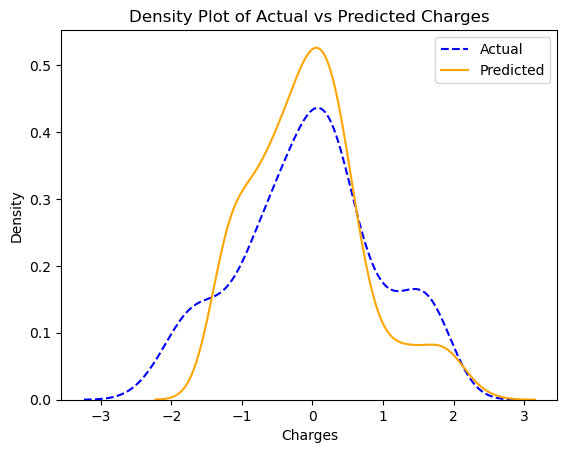

In [24]:
# Plotting the actual charges
ax1 = sns.kdeplot(y_test, color='blue', label='Actual', linestyle="--")

# Plotting the predicted charges
sns.kdeplot(y_pred, ax=ax1, color='orange', label='Predicted')

# Adding a title to the plot
ax1.set_title('Density Plot of Actual vs Predicted Charges')

# Optionally, add labels and a legend
ax1.set_xlabel('Charges')
ax1.set_ylabel('Density')
ax1.legend()

# Show the plot
plt.show()


## Using the Model:
- **Interpretation**: The model's coefficients can be used to interpret the impact of each feature on insurance charges. For example, `smoker_yes` has a positive coefficient, indicating that being a smoker is associated with higher charges.
- **Prediction**: The model can be used to predict charges based on new data. By providing the model with input data for the features, it can output a prediction for the insurance charges.
- **Performance**: The R-squared value on the test set indicates how well the model generalizes to new, unseen data.

## Cross-Validation
Cross-validation is used to evaluate how well a model performs on unseen data. The most common method is K-Fold cross-validation, where the dataset is split into K smaller sets or 'folds'. The model is trained on K-1 folds and validated on the remaining fold. This process is repeated K times, with each fold being used as the validation set once. The results are then averaged to produce a single estimation. This helps to protect against overfitting and provides a more robust understanding of the model's predictive power.


CV R-squared scores: [0.79620248 0.68006463 0.82901528 0.76354856 0.74943066]
CV R-squared: 0.7636523232785738 (+/- 0.05004197918863742)


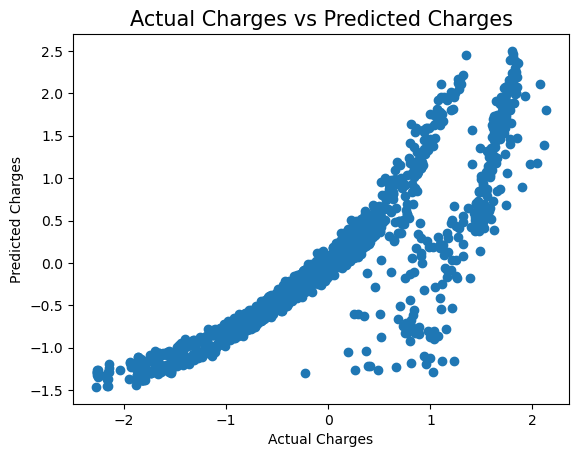

In [25]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Output the mean and standard deviation of the cross-validation scores
print(f"CV R-squared scores: {cv_scores}")
print(f"CV R-squared: {np.mean(cv_scores)} (+/- {np.std(cv_scores)})")

# make graphic of cross validation predictions
cv_predictions = cross_val_predict(model, X, y, cv=5)

# Plot the predicted values
plt.scatter(y, cv_predictions)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges', size=15)
plt.show()


## Residual Analysis
Residuals, the difference between the actual and predicted values, can reveal biases in the model or areas where the model can be improved. A common method to visualize residuals is to plot them in a scatter plot against the predicted values or the independent variables to check for patterns. Ideally, residuals should be randomly scattered around zero, indicating that the model predictions are unbiased.

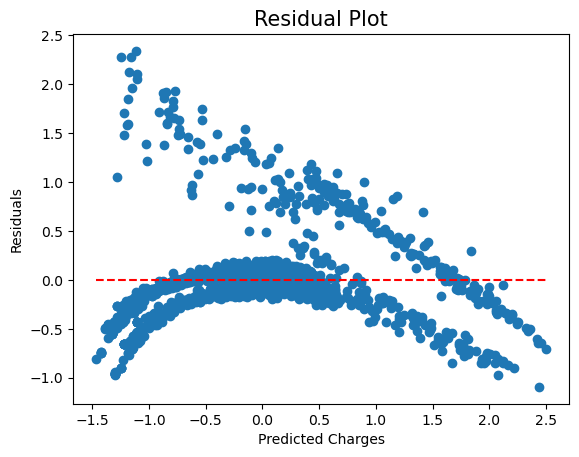

In [26]:
# Train the model on the entire dataset
model.fit(X, y)

# Predict the charges
y_pred = model.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot', size=15)
plt.show()


The two plots above give us visual insights into the performance of a regression model.

### Actual vs. Predicted Charges Plot Analysis

The first plot (Actual Charges vs Predicted Charges) appears to show a non-linear relationship between the actual and predicted charges. Given the curve's shape, it suggests that the model may have some non-linear components or interactions between variables. The points cluster around a curve rather than a straight line, which is particularly noticeable in the higher range of actual charges, indicating that the model predicts lower values than the actual charges for higher-cost cases. This could be a sign that the model underestimates the charges for higher values, which is a common issue in models that do not capture the exponential or higher-degree relationships between variables.

### Residual Plot Analysis

The second plot (Residual Plot) displays the residuals (the differences between actual and predicted values) on the vertical axis and the predicted charges on the horizontal axis. The dashed red line at zero represents the point where the predicted values perfectly match the actual values. The pattern in the residuals with a 'wave-like' structure suggests that the model's predictions are not consistent across the range of charges. The residuals should ideally be randomly scattered around the horizontal line at zero. Here, we can see that for lower and higher predicted charges, the residuals tend to be positive, indicating that the model systematically underpredicts the actual charges. Conversely, around the center of the plot, where predicted charges are moderate, the residuals are mostly negative, indicating overpredictions.

This pattern could be due to several factors:

- The model may not be complex enough to capture the underlying data structure, suggesting a need for more sophisticated models or feature engineering.
- There could be influential outliers or leverage points that are affecting the model's predictions disproportionately.
- The data may inherently have non-linear relationships that a Random Forest might not be capturing entirely.

### Cross-Validation and Residual Analysis Explanations

The cross-validation procedure is a robust method for assessing the generalizability of the model. The R-squared values obtained from this process provide an estimate of the model's performance on unseen data. When these scores vary significantly, it can indicate that the model's performance is not stable across different subsets of the data.

For the residual analysis, assessing the distribution and pattern of residuals is crucial. A good predictive model will have residuals that are randomly distributed around zero without any discernible pattern. If the residuals exhibit a clear pattern, as they do in the plot provided, it suggests that the model's assumptions may be violated or that there are elements of the data's structure that the model is not capturing. This might include overlooked variables, incorrect functional forms, or heteroskedasticity (non-constant variance of residuals).

## Conclusion and Next Steps

In summary, our current analysis and the visualizations of the model's performance have provided valuable insights. The Actual vs. Predicted Charges plot revealed a non-linear relationship that our model could not fully capture, and the Residual Plot indicated systematic under and overpredictions at different levels of charges.

Based on these observations, we have identified an opportunity to enhance our predictive accuracy. The next logical step is to develop an additional model utilizing a different estimator capable of capturing complex, non-linear relationships more effectively. To this end, we will explore the Random Forest algorithm.

Random Forest is an ensemble learning method known for its high accuracy and ability to model non-linear relationships due to its structure of multiple decision trees that operate as an ensemble. Each tree in the Random Forest splits the data based on non-linear decision boundaries, which, when aggregated, can capture more complex patterns than a single decision tree or linear models.

By harnessing the Random Forest regressor, we aim to improve the model's ability to predict the actual charges, especially in the higher-cost cases where the current model tends to underestimate the charges. We anticipate that the Random Forest model, with its robustness to outliers and capacity for modeling interactions between features, will yield more accurate predictions across the spectrum of charges.

The next phase of our project will involve training a Random Forest model, tuning its hyperparameters, and then evaluating its performance through cross-validation. We will compare the results with our current model to ascertain the improvements in predictive power, particularly in capturing the non-linear dependencies observed in our dataset.